# Diabetes Prediction Using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Dataset link : [https://www.kaggle.com/mathchi/diabetes-data-set](https://www.kaggle.com/mathchi/diabetes-data-set)

# **Objective**


We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

# **Details about the dataset**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

# **Step 1 : Importing  libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes1.csv")

# **Step 2 : Data Preprocessing and descriptive statistics**

In [3]:
# The first 10 observations of the data set were accessed.

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,1,89,66,23,94,28.1,0.167,21,0
2,5,116,74,0,0,25.6,0.201,30,0
3,10,115,0,0,0,35.3,0.134,29,0
4,4,110,92,0,0,37.6,0.191,30,0
5,10,139,80,0,0,27.1,1.441,57,0
6,1,103,30,38,83,43.3,0.183,33,0
7,3,126,88,41,235,39.3,0.704,27,0
8,8,99,84,0,0,35.4,0.388,50,0
9,1,97,66,15,140,23.2,0.487,22,0


<b>Some features like Pregnancies , BloodPressure , Skin Thickness , Insulin , BMI have 0 value which represent missing data.

<b>In the Outcome column , 1 represents Diabetes Positive and 0 represents Diabetes Negative.

In [4]:
# To handle the 0 values, we created a new dataset with same value as df dataset.
dataset_new=df


In [5]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.nan)

In [6]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
2,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
3,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
4,4,110.0,92.0,NaN,NaN,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
1029,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
1030,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1
1031,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1
1032,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1


In [7]:
 # Replacing NaN with mean values
 dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
 dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
 dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
 dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
 dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [8]:
dataset_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85.0,66.00000,29.000000,168.274809,26.6,0.351,31,0
1,1,89.0,66.00000,23.000000,94.000000,28.1,0.167,21,0
2,5,116.0,74.00000,30.106944,168.274809,25.6,0.201,30,0
3,10,115.0,73.16175,30.106944,168.274809,35.3,0.134,29,0
4,4,110.0,92.00000,30.106944,168.274809,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
1029,1,128.0,88.00000,39.000000,110.000000,36.5,1.057,37,1
1030,0,123.0,72.00000,30.106944,168.274809,36.3,0.258,52,1
1031,6,190.0,92.00000,30.106944,168.274809,35.5,0.278,66,1
1032,9,170.0,74.00000,31.000000,168.274809,44.0,0.403,43,1


## The missing values were handled.

In [9]:
# Dataset dimensions - (rows, columns)

dataset_new.shape

(1034, 9)

In [10]:
# Description of the dataset

dataset_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,4.103482,126.945472,73.161750,30.106944,168.274809,33.233692,0.491911,34.217602,0.516441
std,3.497188,31.470340,12.118777,8.818969,88.403854,6.919788,0.344219,11.677086,0.499971
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,66.000000,26.000000,135.000000,28.400000,0.251250,25.000000,0.000000
50%,3.000000,123.000000,73.161750,30.106944,168.274809,32.900000,0.391000,31.000000,1.000000
75%,7.000000,147.000000,80.000000,33.000000,168.274809,37.200000,0.654750,42.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Checking for null values

dataset_new.isnull().values.any()

False

In [12]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1034 non-null   int64  
 1   Glucose                   1034 non-null   float64
 2   BloodPressure             1034 non-null   float64
 3   SkinThickness             1034 non-null   float64
 4   Insulin                   1034 non-null   float64
 5   BMI                       1034 non-null   float64
 6   DiabetesPedigreeFunction  1034 non-null   float64
 7   Age                       1034 non-null   int64  
 8   Outcome                   1034 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 72.8 KB


# **Observation**

1. There are a total of 1034 records and 9 features in the dataset.
2. Each feature is either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data which was handled.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# **Step 3 : Data Visualization**

<AxesSubplot:xlabel='Outcome', ylabel='count'>

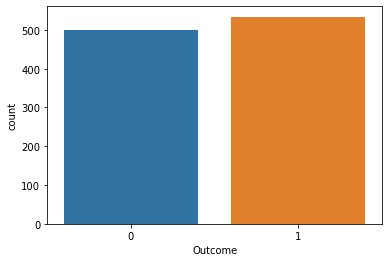

In [13]:
# Outcome countplot

sns.countplot(x = 'Outcome',data = dataset_new)

<AxesSubplot:>

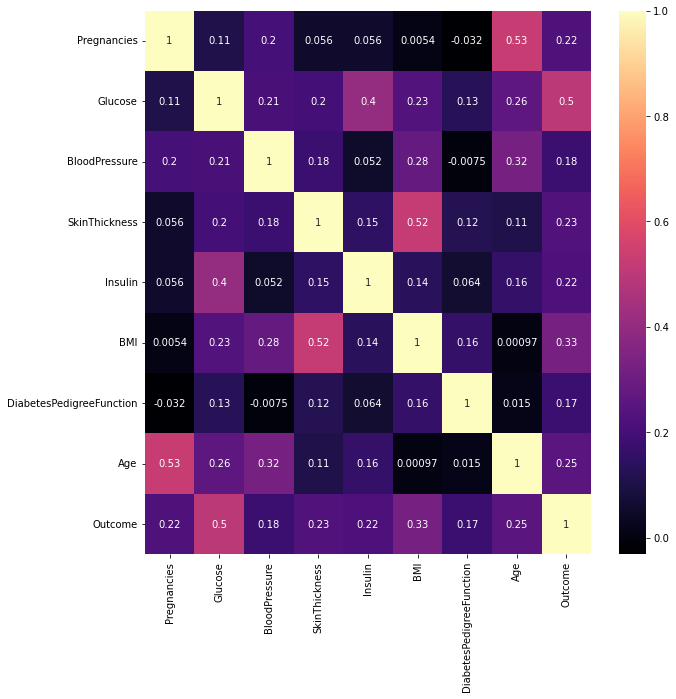

In [14]:
correlation=dataset_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = "magma")

<b> From the correlation heatmap , we can see that there is a high Correaltion between Outcome and [ Pregnancies , Glucose , Insulin , BMI , Age ].     

**We can select these features to accept input data from user and predict the outcome.**

<AxesSubplot:xlabel='Age', ylabel='count'>

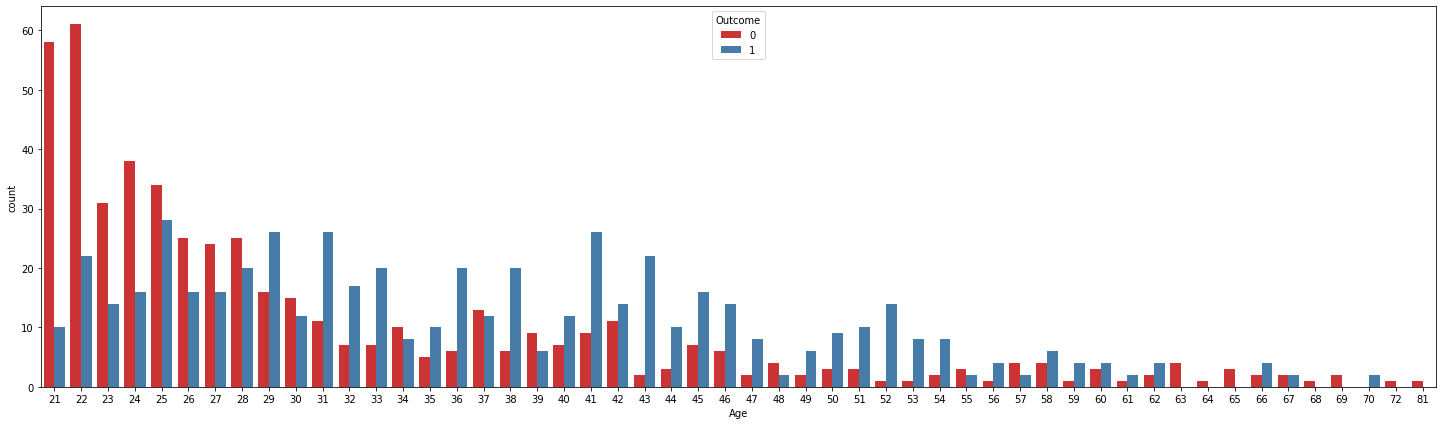

In [15]:
plt.figure(figsize=(25,7))
sns.countplot(x='Age',hue='Outcome',data=dataset_new,palette='Set1')

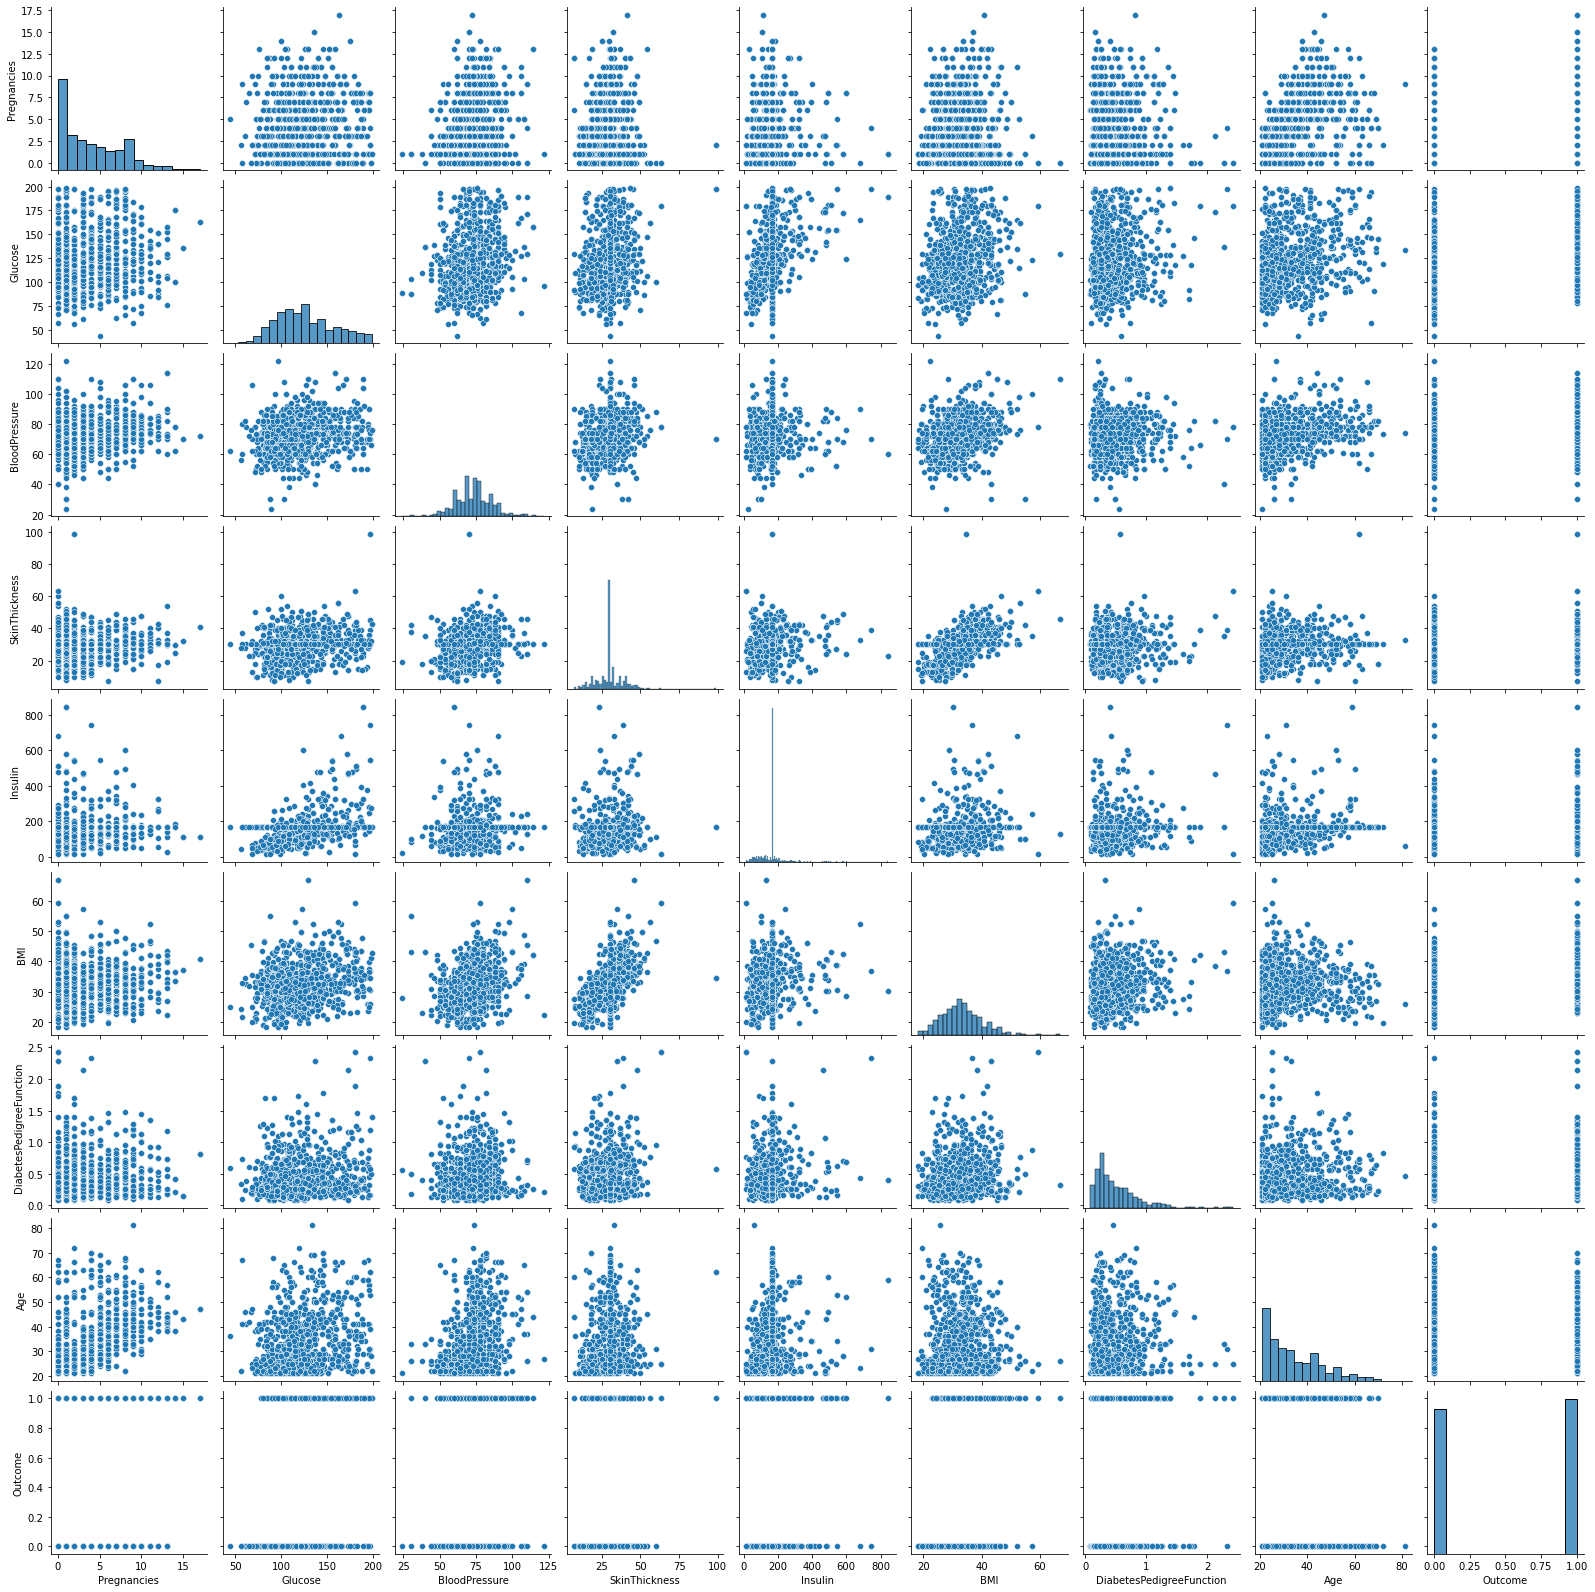

In [16]:
sns.pairplot(dataset_new)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

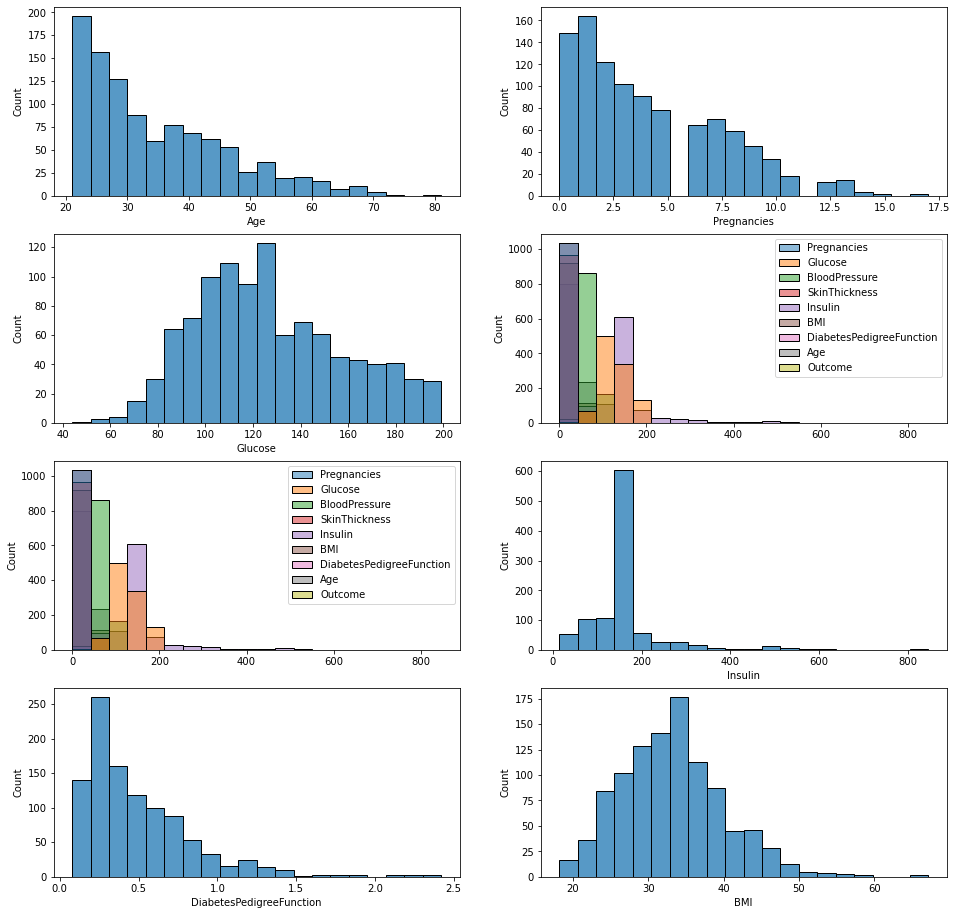

In [17]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(dataset_new.Age, bins = 20, ax=ax[0,0]) 
sns.histplot(dataset_new.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.histplot(dataset_new.Glucose, bins = 20, ax=ax[1,0]) 
sns.histplot(dataset_new, bins = 20, ax=ax[1,1]) 
sns.histplot(dataset_new, bins = 20, ax=ax[2,0]) 
sns.histplot(dataset_new.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(dataset_new.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.histplot(dataset_new.BMI, bins = 20, ax=ax[3,1]) 

In [18]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,110.741673
1,142.117569


Here we observe if the glucose value is around 142 then there is a high chance of having diabetes.

### **Selecting the feautures and splitting our dataset**

In [19]:
# Selecting features - [Pregnancies,Glucose, Insulin, BMI, Age]
X = dataset_new.iloc[:, [0,1,4,5,7]].values
Y = dataset_new.iloc[:, 8].values

In [20]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify = df['Outcome'] )

### **Feature Scaling**

In [21]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Step 4: Data Modelling


## **Applying KNN algorithm**


In [22]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [23]:
# Making predictions on test dataset
Y_pred_knn = knn.predict(X_test)

In [24]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)


In [25]:
# Accuracy on test set
print("K Nearest neighbors: " + str(accuracy_knn * 100))


K Nearest neighbors: 80.67632850241546


### creating a list to store the accuracy of different machine learning algorithm on this dataset

In [26]:
m_accuracy=[] #creating a list to store the accuracy of different machine learning algorithm on this dataset
m_accuracy.append(accuracy_knn*100)

In [27]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_knn))

Confusion Matrix: [[72 28]
 [12 95]]


<AxesSubplot:>

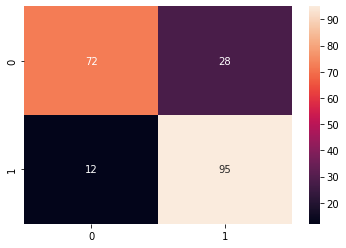

In [28]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_knn)), annot=True)


## **Applying SVM algorithm**


#### RBF SVM Classification:

In [29]:
from sklearn.svm import SVC

#### RBF SVM Classification:
classifier = SVC(kernel = 'rbf', random_state = 0)


classifier.fit(X_train, Y_train)
Y_pred_rbf_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_rbf_svm=accuracy_score(Y_test, Y_pred_rbf_svm)*100
print("Accuracy: ",accuracy_rbf_svm)

Accuracy:  82.1256038647343


In [30]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_rbf_svm))

Confusion Matrix: [[72 28]
 [ 9 98]]


<AxesSubplot:>

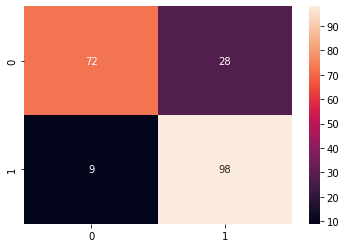

In [31]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_rbf_svm)), annot=True)

#### Linear SVM Classification:

In [32]:
from sklearn.svm import SVC

#### Linear SVM Classification:
classifier= SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, Y_train)
Y_pred_lin_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_linear_svm=accuracy_score(Y_test, Y_pred_lin_svm)*100
print("Accuracy: ",accuracy_linear_svm)

Accuracy:  83.09178743961353


In [33]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_lin_svm))

Confusion Matrix: [[81 19]
 [16 91]]


<AxesSubplot:>

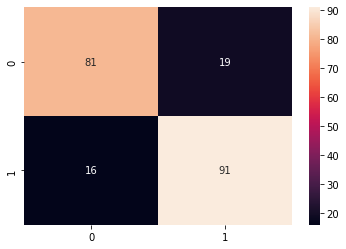

In [34]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_lin_svm)), annot=True)

#### Polynomial SVM Classification:

In [35]:
from sklearn.svm import SVC

#### Polynomial SVM Classification:
classifier = SVC(kernel = 'poly', random_state = 0,degree = 4)


classifier.fit(X_train, Y_train)
Y_pred_poly_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_poly_svm=accuracy_score(Y_test, Y_pred_poly_svm)*100
print("Accuracy: ",accuracy_poly_svm)

Accuracy:  83.09178743961353


In [36]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_poly_svm))

Confusion Matrix: [[87 13]
 [22 85]]


<AxesSubplot:>

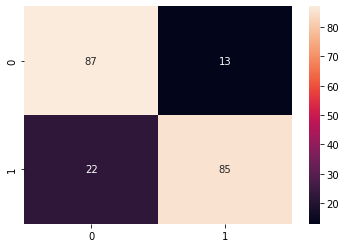

In [37]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_poly_svm)), annot=True)

#### Sigmoid SVM Classification:

In [38]:
from sklearn.svm import SVC

#### Sigmoid SVM Classification:
classifier = SVC(kernel = 'sigmoid', random_state = 0)

classifier.fit(X_train, Y_train)
Y_pred_sigm_svm=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_sigmoid_svm= accuracy_score(Y_test, Y_pred_sigm_svm)*100
print("Accuracy: ",accuracy_sigmoid_svm)

Accuracy:  17.874396135265698


In [39]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test, Y_pred_sigm_svm))

Confusion Matrix: [[20 80]
 [90 17]]


<AxesSubplot:>

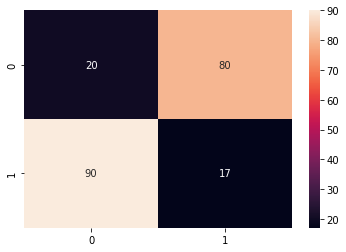

In [40]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test, Y_pred_sigm_svm)), annot=True)

### After applying SVM algorithm, for differenet kernels, we find highest accuracy of SVM using linear function.

In [41]:
m_accuracy.append(accuracy_linear_svm)


## **Applying Naive- Bayes algorithm** 


In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred_nav_bayes=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_naive_bayes=accuracy_score(Y_test,y_pred_nav_bayes)*100
print("Accuracy  :",accuracy_naive_bayes)
m_accuracy.append(accuracy_naive_bayes)

Accuracy  : 81.15942028985508


In [43]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred_nav_bayes))

Confusion Matrix: [[83 17]
 [22 85]]


<AxesSubplot:>

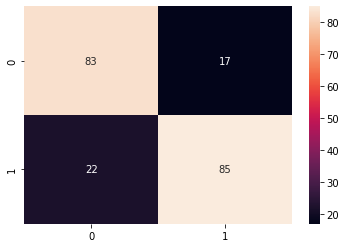

In [44]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred_nav_bayes)), annot=True)


## **Applying Random Forest** 


#### Using gini method

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc_gini_classifier = RandomForestClassifier(n_estimators = 100, 
                criterion = 'gini', random_state =21)


rfc_gini_classifier.fit(X_train, Y_train)
y_pred_rf_gini=rfc_gini_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_gini_random_forest=accuracy_score(Y_test,y_pred_rf_gini)*100
print("Accuracy   :",accuracy_gini_random_forest)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred_rf_gini))

Accuracy   : 92.27053140096618
Confusion Matrix: [[ 84  16]
 [  0 107]]


<AxesSubplot:>

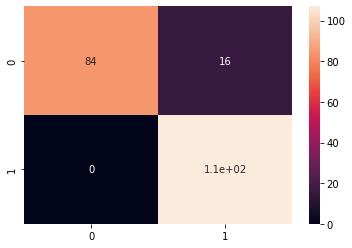

In [46]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred_rf_gini)), annot=True)

#### Using entropy method

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
                criterion = 'entropy', random_state = 0)


classifier.fit(X_train, Y_train)
y_pred_rf_entropy=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_entropy_random_forest=accuracy_score(Y_test,y_pred_rf_entropy)*100
print("Accuracy   :",accuracy_entropy_random_forest)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:",confusion_matrix(Y_test,y_pred_rf_entropy))

Accuracy   : 89.3719806763285
Confusion Matrix: [[ 82  18]
 [  4 103]]


<AxesSubplot:>

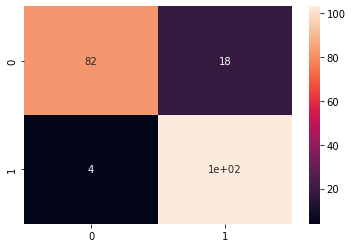

In [48]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred_rf_entropy)), annot=True)

### Using RandomForestClassifier,we see that entropy criteria is giving more accuracy.

In [49]:
m_accuracy.append(accuracy_gini_random_forest)

### Compairing all the accuracies shown by the algorithms

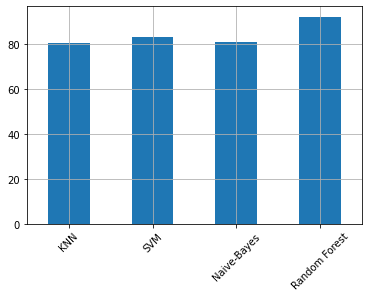

In [50]:
import matplotlib.pyplot as plt
s=pd.Series(m_accuracy,index=['KNN','SVM','Naive-Bayes','Random Forest'])
s.plot.bar()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [51]:
print ("Accuracy using KNN algorithm is: ", m_accuracy[0])
print ("Accuracy using SVM algorithm is: ", m_accuracy[1])
print ("Accuracy using Naive-Bayes algorithm is: ", m_accuracy[2])
print ("Accuracy using Random Forest algorithm is: ", m_accuracy[3])

Accuracy using KNN algorithm is:  80.67632850241546
Accuracy using SVM algorithm is:  83.09178743961353
Accuracy using Naive-Bayes algorithm is:  81.15942028985508
Accuracy using Random Forest algorithm is:  92.27053140096618


# Step 5 : Conclusion

## **After applying different machine learning algorithms on our dataset , we found the best fit algorithm for our model is Random Forest which is giving an accuracy of 92.27%.**

### Feature Importance :
#### Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [52]:
rfc_gini_classifier.feature_importances_

array([0.10087591, 0.32588524, 0.13060548, 0.2407311 , 0.20190227])

<AxesSubplot:>

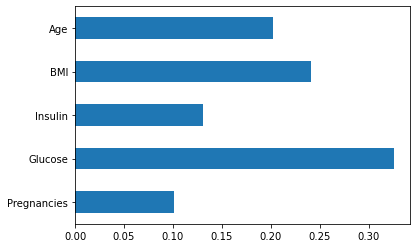

In [53]:
rows=['Pregnancies','Glucose','Insulin','BMI','Age']
(pd.Series(rfc_gini_classifier.feature_importances_,index=rows).plot(kind='barh'))

## Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

# Step 6 : Making a Prediction

In [54]:
input_data = (0,137,40,35,168,43.1,2.228,33)

new_input_data=[]          #Making a new data with only the necessary columns
index_taken=[0,1,4,5,7]
for i in index_taken:
    new_input_data.append(input_data[i])
  

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(new_input_data)

# reshaping the array as we have only single sample as input
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 

# standardize the input data
std_data = sc.transform(input_data_reshaped)

prediction =rfc_gini_classifier.predict(std_data)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic
